In [27]:
import SciServer.SkyServer as SkyServer
import SciServer.CasJobs as CasJobs
import SciServer.SciDrive as SciDrive

In [2]:
import numpy as np
import scipy.misc as imsave
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [3]:
query="""
SELECT p.objId,p.ra,p.dec,p.petror90_r, p.expAB_r,
    p.dered_u as u, p.dered_g as g, p.dered_r as r, p.dered_i as i, 
    s.z, s.plate, s.mjd, s.fiberid, p.g as mag, n.sersic_n,
    e.Amplitude_Ha_6562 as ampHA, e.Flux_Ha_6562 as fluxHA, e.Amplitude_Hb_4861 as ampHB
FROM galaxy AS p
   JOIN SpecObj AS s ON s.bestobjid = p.objid
   JOIN nsatlas AS n ON n.mjd = s.mjd and n.fiberID = s.fiberID and n.plate = s.plate
   JOIN emissionLinesPort as e ON  e.plate = n.plate and e.fiberID = n.fiberID 
WHERE p.petror90_r > 10
  and p.ra between 0 and 360
  and s.z between 0.02 and .1
  and p.g < 17
"""
gals = CasJobs.executeQuery(query, "dr14")

print("SQL query returned " + str(len(gals))+ " galaxies")


SQL query returned 42733 galaxies


In [4]:
query="""
SELECT
objid as objId, nvote,
p_el as elliptical,
p_cw as spiralclock, p_acw as spiralanticlock, p_edge as edgeon,
p_dk as dontknow, p_mg as merger, ra, dec
FROM ZooNoSpec
"""
zoo_gals = CasJobs.executeQuery(query, "dr8")

print("SQL query finished.")
print("SQL query returned " + str(len(zoo_gals))+ " galaxies")

SQL query finished.
SQL query returned 225268 galaxies


In [26]:
gals['u-g'] = gals['u'] - gals['g']
gals['u-r'] = gals['u'] - gals['r']

In [28]:
newgals =  pd.merge(gals, zoo_gals, how = 'left', on='objId')

In [29]:
newgals['spirality'] = newgals['spiralclock'] + newgals['spiralanticlock']
newgals['ellip_spiral'] = newgals['elliptical'] - newgals['spirality']


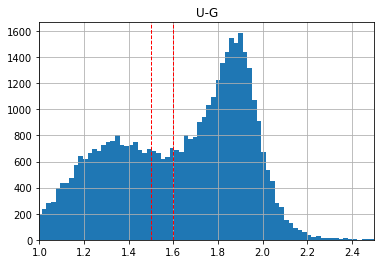

In [31]:
newgals['u-g'].hist(bins=1000)
plt.xlim(1, 2.5)
plt.title('U-G')
plt.axvline(1.5, color='Red', linestyle='dashed', linewidth=1)
plt.axvline(1.6, color='Red', linestyle='dashed', linewidth=1)

In [32]:

blue = newgals.where(newgals['u-g']<1.5).dropna(subset = ['u-g']).reset_index()
red = newgals.where(newgals['u-g']>1.6).dropna(subset = ['u-g']).reset_index()
green = newgals.where(newgals['u-g']<1.6).where(newgals['u-g']>1.5).dropna(subset = ['u-g']).reset_index()


Text(0.5, 1.0, 'U-G vs Magnitude')

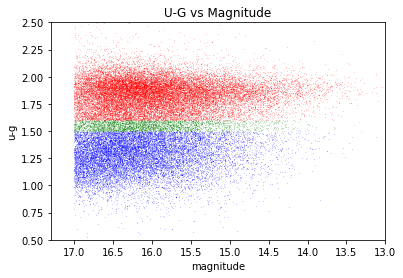

In [33]:
plt.scatter(blue['mag'], blue['u-g'],  s=.02, marker = '.', color = 'Blue')
plt.scatter(red['mag'], red['u-g'],  s=.02, marker = '.', color = 'Red')
plt.scatter(green['mag'], green['u-g'],  s=.02, marker = '.', color = 'Green')
plt.xlim(17.3, 13)
plt.ylim(.5,2.5)
plt.xlabel('magnitude')
plt.ylabel('u-g')
plt.title('U-G vs Magnitude')

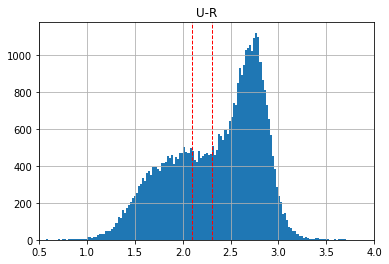

In [35]:
newgals['u-r'].hist(bins=1000)
plt.xlim(.5, 4)
plt.title('U-R')
plt.axvline(2.1, color='Red', linestyle='dashed', linewidth=1)
plt.axvline(2.3, color='Red', linestyle='dashed', linewidth=1)

In [36]:
blue2 = newgals.where(newgals['u-r']<2.1).dropna(subset = ['u-r']).reset_index()
red2 = newgals.where(newgals['u-r']>2.3).dropna(subset = ['u-r']).reset_index()
green2 = newgals.where(newgals['u-r']<2.3).where(newgals['u-r']>2.1).dropna(subset = ['u-r']).reset_index()


Text(0, 0.5, 'u-r')

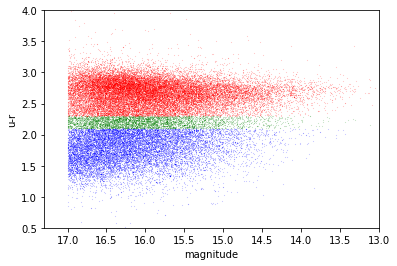

In [37]:
plt.scatter(blue2['mag'], blue2['u-r'],  s=.02, marker = '.', color = 'Blue')
plt.scatter(red2['mag'], red2['u-r'],  s=.02, marker = '.', color = 'Red')
plt.scatter(green2['mag'], green2['u-r'],  s=.02, marker = '.', color = 'Green')
plt.xlim(17.3, 13)
plt.ylim(.5,4)
plt.xlabel('magnitude')
plt.ylabel('u-r')

Text(0.5, 1.0, 'magnitude vs sersic number (U-G)')

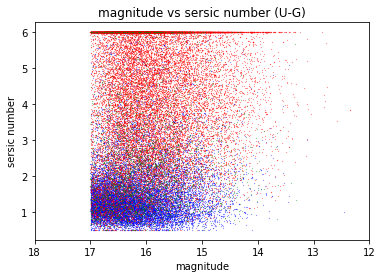

In [38]:
plt.scatter(blue['mag'], blue['sersic_n'],  s=.1, marker = '.', color = 'Blue')
plt.scatter(red['mag'], red['sersic_n'],  s=.1, marker = '.', color = 'Red')
plt.scatter(green['mag'], green['sersic_n'],  s=.1, marker = '.', color = 'Green')
plt.xlabel('magnitude')
plt.ylabel('sersic number')
plt.xlim(18, 12)
plt.title('magnitude vs sersic number (U-G)')




Text(0.5, 1.0, 'magnitude vs sersic number (U-G)')

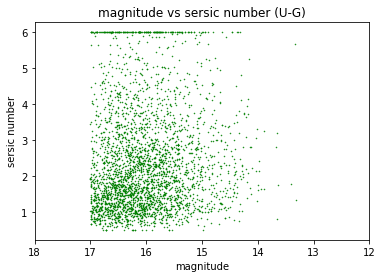

In [39]:
plt.scatter(green['mag'], green['sersic_n'],  s=1, marker = '.', color = 'Green')
plt.xlabel('magnitude')
plt.ylabel('sersic number')
plt.xlim(18, 12)
plt.title('magnitude vs sersic number (U-G)')


Text(0.5, 1.0, 'magnitude vs sersic number (U-R)')

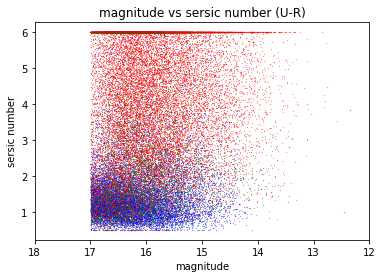

In [40]:
plt.scatter(blue2['mag'], blue2['sersic_n'],  s=.1, marker = '.', color = 'Blue')
plt.scatter(red2['mag'], red2['sersic_n'],  s=.1, marker = '.', color = 'Red')
plt.scatter(green2['mag'], green2['sersic_n'],  s=.1, marker = '.', color = 'Green')
plt.xlabel('magnitude')
plt.ylabel('sersic number')
plt.xlim(18, 12)
plt.title('magnitude vs sersic number (U-R)')



Text(0.5, 1.0, 'magnitude vs sersic number (U-R)')

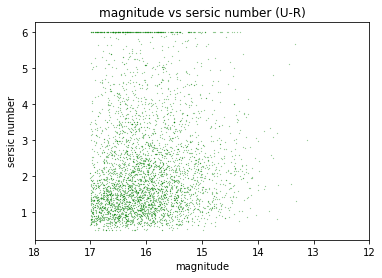

In [41]:
plt.scatter(green2['mag'], green2['sersic_n'],  s=.1, marker = '.', color = 'Green')
plt.xlabel('magnitude')
plt.ylabel('sersic number')
plt.xlim(18, 12)
plt.title('magnitude vs sersic number (U-R)')

Text(0.5, 1.0, 'U-R morphology')

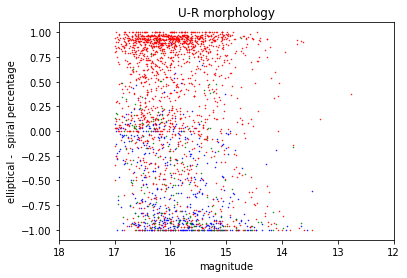

In [42]:
plt.scatter(blue2['mag'], blue2['ellip_spiral'],  s=1, marker = '.', color = 'Blue')
plt.scatter(red2['mag'], red2['ellip_spiral'],  s=1, marker = '.', color = 'Red')
plt.scatter(green2['mag'], green2['ellip_spiral'],  s=1, marker = '.', color = 'Green')
plt.xlabel('magnitude')
plt.ylabel('elliptical -  spiral percentage')
plt.xlim(18, 12)
plt.title('U-R morphology')

Text(0.5, 1.0, 'U-R morphology')

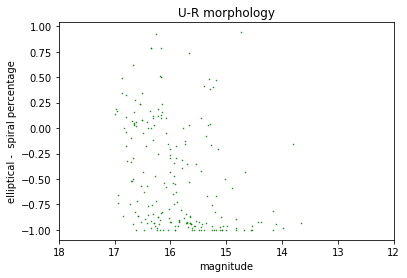

In [43]:
plt.scatter(green2['mag'], green2['ellip_spiral'],  s=1, marker = '.', color = 'Green')
plt.xlabel('magnitude')
plt.ylabel('elliptical -  spiral percentage')
plt.xlim(18, 12)
plt.title('U-R morphology')


In [44]:
mean = green2['ellip_spiral'].mean()
std = green2['ellip_spiral'].std()
print('mean: ' + str(mean) + ' ' + 'std: ' + str(std))

l = len(green2.dropna())
print(str(l))
a = mean + 1.96*(std/math.sqrt(l))
b = mean - 1.96*(std/math.sqrt(l))
print('('+ str(a) + ', ' + str(b) + ')')


mean: -0.47368599025415625 std: 0.5195165340715951
207
(-0.40291255560015427, -0.5444594249081582)


Text(0.5, 1.0, 'U-R elliptical - spiral')

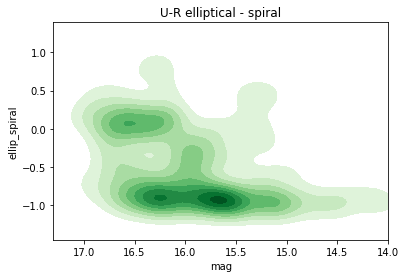

In [51]:
g2 = green2.dropna(subset = ['ellip_spiral', 'mag'])
sns.kdeplot(g2['mag'], g2['ellip_spiral'], cmap = "Greens", shade = True, bw = .15, shade_lowest = False)
plt.xlim(17.3, 14)
plt.title('U-R elliptical - spiral')

Text(0.5, 1.0, 'U-R elliptical - spiral')

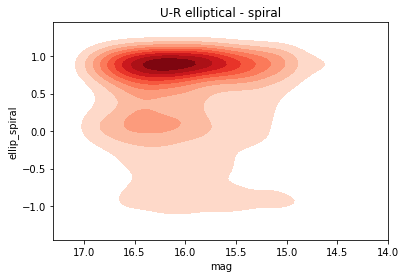

In [52]:
r2 = red2.dropna(subset = ['ellip_spiral', 'mag'])
sns.kdeplot(r2['mag'], r2['ellip_spiral'], cmap = "Reds", shade = True, bw = .15, shade_lowest = False)
plt.xlim(17.3, 14)
plt.title('U-R elliptical - spiral')


Text(0.5, 1.0, 'U-R elliptical - spiral')

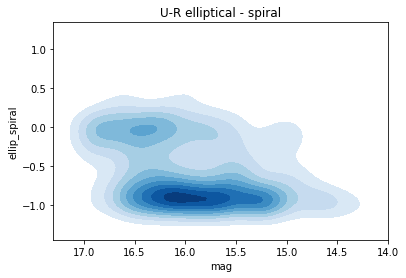

In [53]:
b2 = blue2.dropna(subset = ['ellip_spiral', 'mag'])
sns.kdeplot(b2['mag'], b2['ellip_spiral'], cmap = "Blues", shade = True, bw = .15, shade_lowest = False)
plt.xlim(17.3, 14)
plt.title('U-R elliptical - spiral')

(-5, 2000)

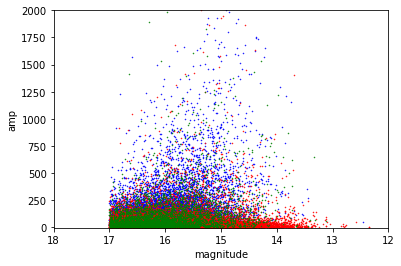

In [48]:
plt.scatter(blue2['mag'], blue2['ampHA'],  s=1, marker = '.', color = 'Blue')
plt.scatter(red2['mag'], red2['ampHA'],  s=1, marker = '.', color = 'Red')
plt.scatter(green2['mag'], green2['ampHA'],  s=1, marker = '.', color = 'Green')
plt.xlabel('magnitude')
plt.ylabel('amp')
plt.xlim(18, 12)
plt.ylim(-5, 2000)
plt.title('U-R amplitude of Hydrogen')

(-5, 2000)

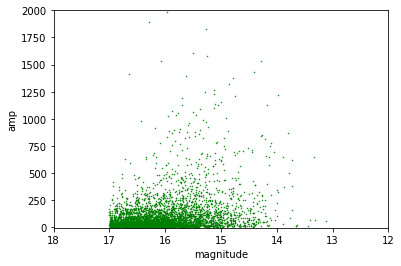

In [50]:
plt.scatter(green2['mag'], green2['ampHA'],  s=1, marker = '.', color = 'Green')
plt.xlabel('magnitude')
plt.ylabel('amp')
plt.xlim(18, 12)
plt.ylim(-5, 2000)

Text(0.5, 1.0, 'Amplitude of Hydrogen A vs magnitude (U-R)')

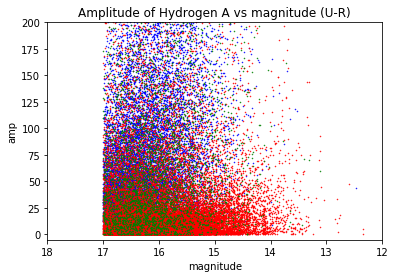

In [55]:
plt.scatter(blue2['mag'], blue2['ampHA'],  s=1, marker = '.', color = 'Blue')
plt.scatter(red2['mag'], red2['ampHA'],  s=1, marker = '.', color = 'Red')
plt.scatter(green2['mag'], green2['ampHA'],  s=1, marker = '.', color = 'Green')
plt.xlabel('magnitude')
plt.ylabel('amp')
plt.xlim(18, 12)
plt.ylim(-5, 200)
plt.title('Amplitude of Hydrogen Alpha vs magnitude (U-R)')

Text(0.5, 1.0, 'Amplitude of Hydrogen A vs magnitude (U-R)')

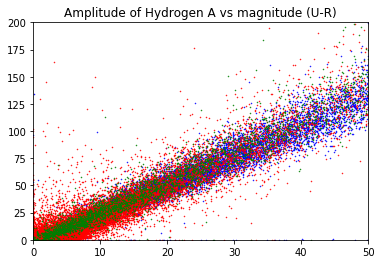

In [54]:
plt.scatter(blue2['ampHB'], blue2['ampHA'],  s=1, marker = '.', color = 'Blue')
plt.scatter(red2['ampHB'], red2['ampHA'],  s=1, marker = '.', color = 'Red')
plt.scatter(green2['ampHB'], green2['ampHA'],  s=1, marker = '.', color = 'Green')

plt.xlim(0, 50)
plt.ylim(0, 200)
